In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
mask = cv2.imread('C:/Users/moham/Desktop/images with masks/masks/Benign/A_1123_1_LEFT_CC_breastArea.ome.tiff',cv2.THRESH_OTSU)
hist = cv2.calcHist([mask],[0],None,[256],[0,256])
plt.hist(mask.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

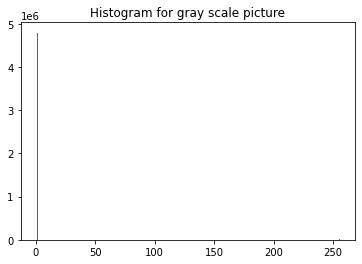

In [33]:
mask1 = cv2.imread('C:/Users/moham/Desktop/breast cancer dataset/masksCancer/Benign/A_1123_1.LEFT_CC_Mask_FloodFill.png',cv2.THRESH_OTSU)
hist1 = cv2.calcHist([mask1],[0],None,[256],[0,256])
plt.hist(mask1.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

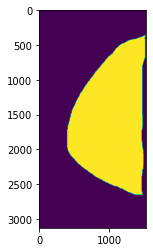

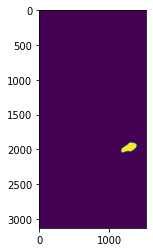

In [27]:
plt.imshow(mask)
plt.show()
plt.imshow(mask1)
plt.show()



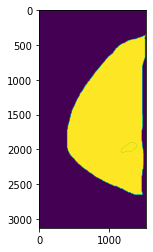

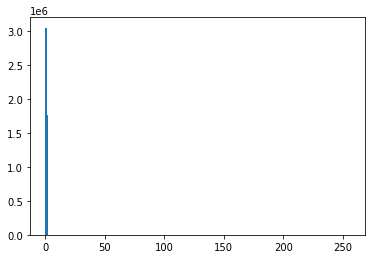

In [35]:
mask2=cv2.bitwise_and(mask, mask, mask=mask1)
plt.imshow(mask2)
plt.show()
hist2 = cv2.calcHist([mask2],[0],None,[256],[0,256])
plt.hist(mask2.ravel(),256,[0,256])
plt.show()

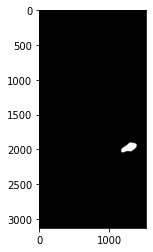

In [39]:
from PIL import Image
img = Image.open('C:/Users/moham/Desktop/breast cancer dataset/masksCancer/Benign/A_1123_1.LEFT_CC_Mask_FloodFill.png')
img1=img.convert('P')
plt.imshow(img1)
plt.show()


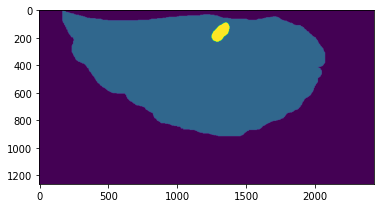

[0 1 3]


In [13]:
mask = cv2.imread('C:/Users/moham/Desktop/augmented img and mask/aug_mask_combined/augmented_mask_1.png',0)
plt.imshow(mask)
plt.show()
print(np.unique(mask))
from tensorflow.keras.utils import to_categorical
masks=np.expand_dims(mask,0)
train_masks_cat = to_categorical(mask, 4)

In [ ]:
# load model for prediction

In [1]:
import os
import cv2
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy import loadtxt
from keras.models import load_model
import pickle

model = load_model('ModelCheckPoints/UNET_MODEL_1.h5', compile=False)
def cropImageAndmask(image,mask):
    cropped = cv2.bitwise_and(image, image, mask=mask)
    return cropped
def savetoDir(path,image):
    cv2.imwrite(os.path.join(path, f'{image}'.png),cropped)
read_PATH='C:/Users/moham/Desktop/breast cancer dataset/images'
# write_PATH='C:/Users/moham/Desktop/images with masks/cropped images'
write_PATH='C:/Users/moham/Desktop/breast cancer dataset/MasksBreastArea'
# blurr_PATH='C:/Users/moham/Desktop/images with masks/blurred'
CATEGORIES = ["Benign","Cancer","Normal"]
IMG_X=512
IMG_Y=512

In [2]:
i=0
for category in CATEGORIES:
    Xpath = os.path.join(read_PATH, category)
    Ypath= os.path.join(write_PATH, category)
    # zpath=os.path.join(blurr_PATH,category)
    class_Num=CATEGORIES.index(category)
    j=0
    for img in os.listdir(Xpath):
        img_array = cv2.imread(os.path.join(Xpath,img),cv2.IMREAD_COLOR)## blur image path
        # blur = cv2.GaussianBlur(img_array, (5, 5), 0)
        # cv2.imwrite(os.path.join(zpath, f'Blurred-{i}-__{j}.png'),blur)
        resized_img = cv2.resize(img_array,(IMG_X,IMG_Y))
        InputImage=np.expand_dims(resized_img, axis=0)
        preds_test = model.predict(InputImage, verbose=1)
        preds_test_t = (preds_test > 0.5).astype(np.uint8)
        # plt.imshow(preds_test_t[0])
        # plt.show()
        # Cropped=cv2.bitwise_and(resized_img, resized_img, mask=preds_test_t[0])
        cv2.imwrite(os.path.join(Ypath, f'{img[:-4]}_BA.png'),preds_test_t[0])
        # plt.imshow(resized_img)
        # plt.show()
        # plt.imshow(preds_test[0])
        # plt.show()
        # plt.imshow(preds_test_t[0])
        # plt.show()
        # plt.imshow(Cropped)
        # plt.show()
        # cv2.imwrite(os.path.join(Ypath, f'{img}-{i}-__{j}.png'),Cropped)
    #     j=j+1
    #     if j==1:
    #         break
    # i=i+1
    # break

Cause: could not parse the source code of <function <lambda> at 0x0000020106273670>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function <lambda> at 0x0000020106273670>: no matching AST found
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 52ms/step
